# 1 Testing Hash Functions

In [1]:
#import relevant libraries
from sklearn.utils import murmurhash3_32
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

seed = 8712634
random.seed(seed)

In [2]:
#define class for hash functions:
class HashFunctions:

    def __init__(self):
        #randomly generate a,b,c,d
        self.a = random.randint(1, 1048573)
        self.b = random.randint(1, 1048573)
        self.c = random.randint(1, 1048573)
        self.d = random.randint(1, 1048573)
        self.P = 1048573

    def h2_universal(self, key):
        return bin(((self.a*int(key) + self.b) % self.P) % 1024)[2:]
    
    def h3_universal(self, key):
        return bin(((self.a*(int(key)**2) + self.b*int(key) + self.c) % self.P) % 1024)[2:]
    
    def h4_universal(self, key):
        return bin(((self.a*(int(key)**3) + self.b*(int(key)**2) + self.c*int(key) + self.d) % self.P) % 1024)[2:]
    
    def murmur(self, key):
        return bin(murmurhash3_32(key, seed, positive=True) % 1024)[2:]
    
    
    

In [3]:
# generating random set for x
x = [bin(random.getrandbits(31))[2:] for i in range(5000)]

#set all keys to the same length
x = [(31 - len(key))*'0' + key for key in x]


In [18]:
print([bin(random.getrandbits(31))[2:] for i in range(10)])

['111111000101000110110111101000', '11110001011110100100101111111', '1101100100101010101001000110011', '1111110000110000000101011111110', '1110100100101001010011101101010', '1100010101010110110001010101111', '111001010010010101000000010001', '111010110001100010111010110110', '111000011011011101001110101000', '1010100101000001111011010011001']


In [4]:
#define function for avalance analysis

def flipChar(string, index):
    if string[index] == '1':
        string = string[:index] + '0' + string[index+1:]
    else:
        string = string[:index] + '1' + string[index+1:]
    
    return string

def avalanche(inputString, heatmap, hashfunction):
    
    output = hashfunction(inputString)
    output = (10 - len(output))*'0' + output
    
    for i in range(len(inputString)):
        testString = flipChar(inputString, i)
        
        testOutput = hashfunction(testString)
        testOutput = (10 - len(testOutput))*'0' + testOutput
        
        for j in range(len(output)):
            if output[j] != testOutput[j]:
                heatmap[i, j] += 1
    
    return heatmap
        
        

In [5]:
#Avalanche Analysis for 2 universal hash
h2_heatmap = np.zeros([31,10])
myHash = HashFunctions()
for inputString in x:
    h2_heatmap = avalanche(inputString, h2_heatmap, myHash.h2_universal)

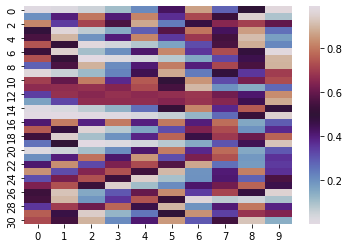

In [6]:
sns.heatmap(pd.DataFrame(h2_heatmap/5000), cmap="twilight")
plt.show()

In [7]:
#Avalanche Analysis for 3 universal hash
h3_heatmap = np.zeros([31,10])
for inputString in x:
    h3_heatmap = avalanche(inputString, h3_heatmap, myHash.h3_universal)

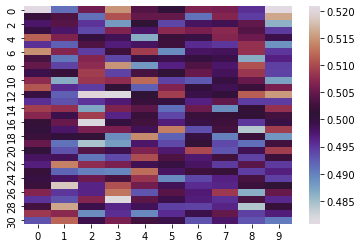

In [8]:
sns.heatmap(pd.DataFrame(h3_heatmap/5000), cmap="twilight")
plt.show()

In [9]:
#Avalanche Analysis for 4 universal hash
h4_heatmap = np.zeros([31,10])
for inputString in x:
    h4_heatmap = avalanche(inputString, h4_heatmap, myHash.h4_universal)

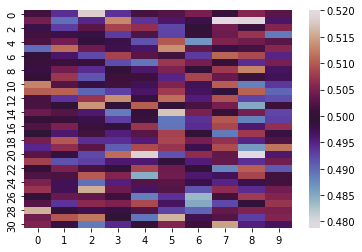

In [10]:
sns.heatmap(pd.DataFrame(h4_heatmap/5000), cmap="twilight")
plt.show()

In [11]:
#Avalanche Analysis for  murmurhash
murmur_heatmap = np.zeros([31,10])
for inputString in x:
    murmur_heatmap = avalanche(inputString, murmur_heatmap, myHash.murmur)

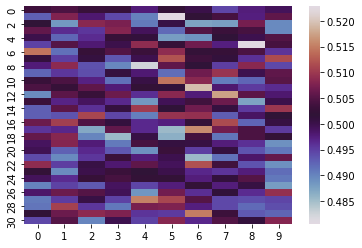

In [12]:
sns.heatmap(pd.DataFrame(murmur_heatmap/5000), cmap="twilight")
plt.show()